#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [6]:
## import cv2
## import numpy
## import matplotlib pyplot
## import KMeans cluster from sklearn
## import distance from scipy.spatial

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import cv2
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import wandb
wandb.init(project='project_1')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: mohak-agarwala-ug23 (mohak-agarwala-ug23-plaksha-infotech) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [7]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("Plaksha_Faculty.jpg")
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face"  # The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  # Font type
font_scale = 1  # Font scale factor
font_color = (0, 0, 255)  # Text color in BGR format (red)
font_thickness = 2  # Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)

## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of faces detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

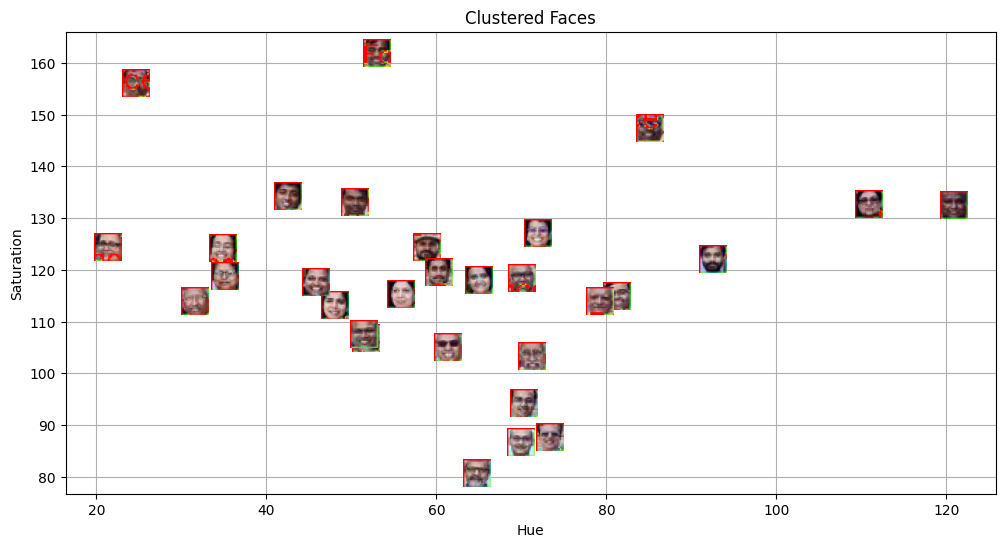

In [ ]:
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustered Faces")
plt.grid()
plot_path = "clustered_face.png"
plt.savefig(plot_path)

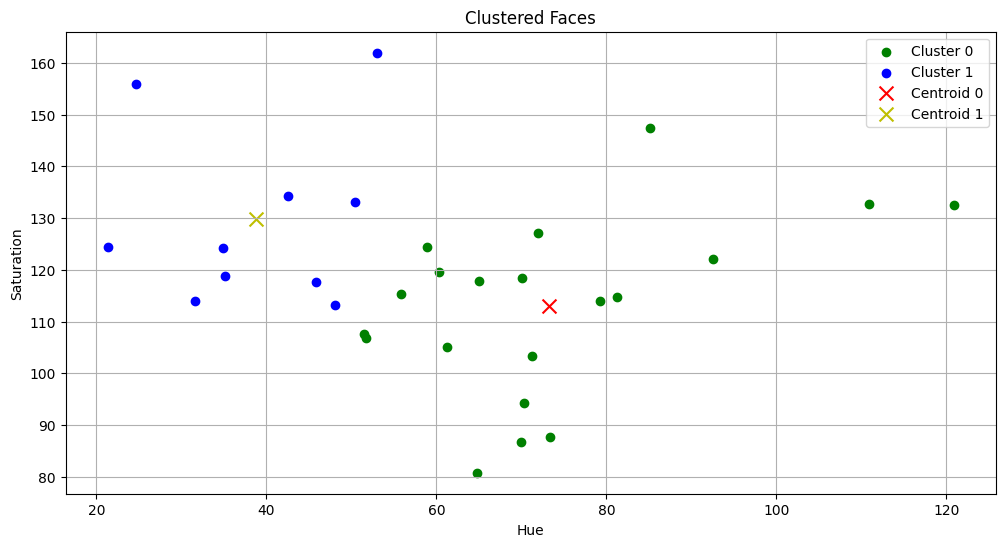

In [9]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='g', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='b', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = centroids[0]
centroid_1 = centroids[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='r', label='Centroid 0', marker='x', s=100)
plt.scatter(centroid_1[0], centroid_1[1], c='y', label='Centroid 1', marker='x', s=100)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clustered Faces")
## Add a legend
plt.legend()
## Add grid
plt.grid()
## Show the plot
plt.show()


In [15]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = "Dr_Shashi_Tharoor.jpg"
template_img = cv2.imread(template_img)
# Detect face  in the template image after converting it to gray and store it in template_faces
gs_template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(gs_template_img, 1.05, 4, minSize=(30,30), maxSize=(1000,1000))

# comment this out to view the detected faces in the grayscale image, by default showing on original image
# template_img = gs_template_img


# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 55, 122), 3)
    cv2.putText(template_img, "Shashi", (x, y-1000), font, font_scale, font_color, font_thickness)  #??????WHAT

cv2.imshow("Detected faces in template image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

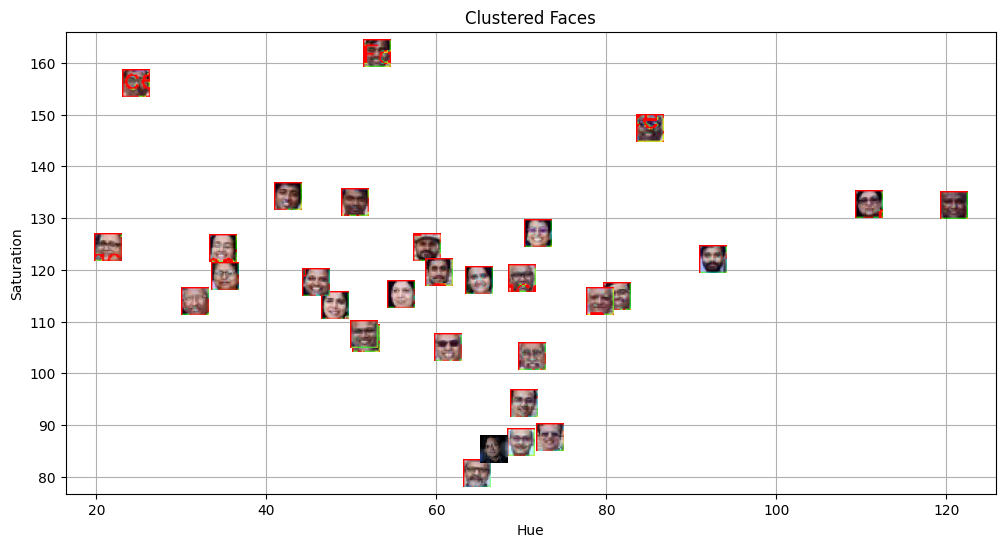

In [11]:
# Convert the template image to HSV color space and store it in template_hsv
template_img = "Dr_Shashi_Tharoor.jpg"
template_img = cv2.imread(template_img)
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clustered Faces")
## Add grid
plt.grid()
# Save the figure
plot_path = "clustered_face_template.png"
plt.savefig(plot_path)

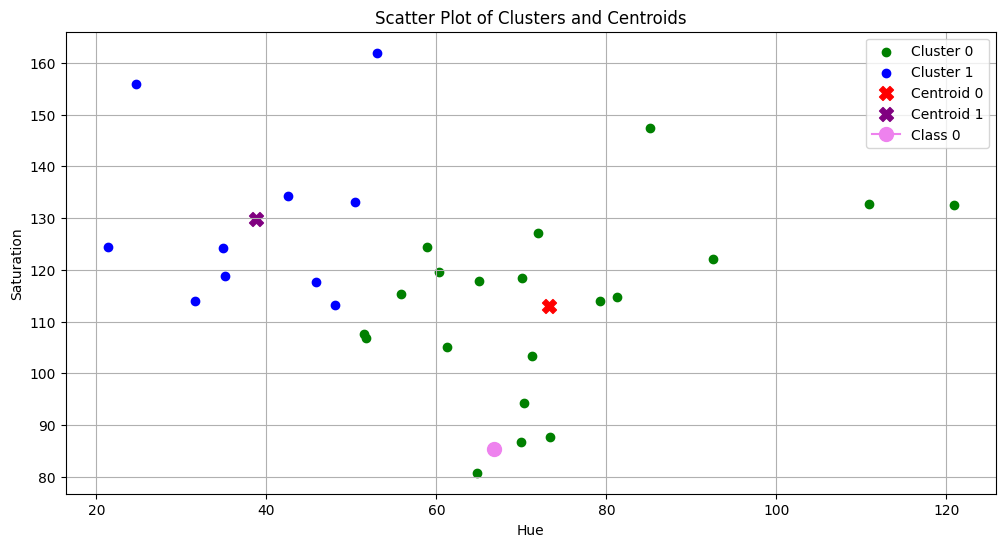

In [12]:
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))

# Assuming faces_rect and hue_saturation are defined
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='g', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='b', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = centroids[0]
centroid_1 = centroids[1]
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=100, label='Centroid 0')  # Red X for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='purple', marker='X', s=100, label='Centroid 1')  # Purple X for centroid 1

# Plot the template point
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class {}'.format(template_label))

# Add x and y labels
plt.xlabel('Hue')
plt.ylabel('Saturation')

# Add title
plt.title('Scatter Plot of Clusters and Centroids')

# Add a legend
plt.legend()

# Add grid
plt.grid(True)

# Save the figure
plot_path = "plot_clustered_centroid.png"
plt.savefig(plot_path)
wandb.log({"Inertia": kmeans.inertia_})
wandb.log({"Cluster Scatter Plot": wandb.Image(plot_path)})

## Report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
Common distance measures - Euclidean, Manhattan, Minkowski, Chebyshev and Hamming distances - are employed for distance-based classification algorithms.
Euclidean distances are expressed in the units of the length between the points [((x2-x1)^2 + (y2-y1)^2)^(1/2)] , while Manhattan distances are expressed in the units of the sum of the absolute differences in dimensions.
Minkowski generalizes Euclidean and Manhattan to an arbitrarily parameterized and parametrized weighted sum as well as gives a genral equation for other distance metrics.
Chebyshev(greatest difference along any axis) and Hamming quantify the largest amplitude of coordinate difference (Chebyshev and the symbol difference (Hamming) of categorical data, respectively). 


#### 2. What are some real-world applications of distance-based classification algorithms? 
Distance-based learning algorithms are one of the applications into real world implementation which have been observed outside of the fields of image-based, character-based handwriting based recognition, and document-based classification, etc. These algorithms are used for medical diagnosis and fraudulent transaction detection, both of which can be understood as the similarity between patient data and the similarity between transaction patterns, respectively. These allow, among other things, the goal of what the users would like, the detection of anomalies, clustering similar data-points, natural language recognition, and natural language processing. Additionally, distance-sensitive approaches are employed as such in the fields of clustering, segmentation, and pattern recognition, where they are effectively applied for decision making in research-related applications and industrial applications.

#### 3. Explain various distance metrics. 
- **Euclidean Distance:**  
  Calculates the straight-line distance between two points.  
  \[
  d(x, y) = sqrt( sum[i=1 to n] (x_i - y_i)^2 )
  \]

- **Manhattan Distance:**  
  Sum of the absolute differences.  
  \[
  d(x, y) = sum[i=1 to n] |x_i - y_i|
  \]

- **Minkowski Distance:**  
  Generalized form with parameter \(p\).  
  \[
  d(x, y) = ( sum[i=1 to n] |x_i - y_i|^p )^(1/p)
  \]

- **Chebyshev Distance:**  
  Maximum absolute difference among dimensions.  
  \[
  d(x, y) = max(|x_i - y_i|) for all i
  \]
  
- **Cosine Similarity:**  
  Measures the cosine of the angle between two vectors.  
  \[
  sim(x, y) = (x · y) / (||x|| * ||y||)
  \]

- **Hamming Distance:**  
  Counts the number of differing symbols.  
  \[
    d(x, y) = count of positions where x_i ≠ y_i
  \]

#### 4. What is the role of cross validation in model performance? 
Cross Validation is a powerful technique for estimating model performance and to prevent overfitting unseen data. It divides the dataset into several folds, and alternatively treats each fold as a test set, and uses the other folds for training. This iterative process minimizes over fitting, provides some point of confidence in terms of estimating accuracy and helps with hyperparameter tuning and model selection. In general, cross validation yields an unbiased assessment of a model's ability to get an estimate of future cases (non-trivial task, given the complex nature of real-world data) and thus guarantees robustness, reproducibility, and effectiveness of the model in the real world (non-trivial task, given the complex nature of real-world data). In practice, it enhances model trustworthiness.

#### 5. Explain variance and bias in terms of KNN? 
Bias refers to the oversimplified assumptions of KNN, and variance refers to the sensitivity to the randomness of the training data. Ideally, a low bias model, i.e., the KNN with a small k value, should be similar to the training data but may have high variance and overfitting. On the contrary, with a more prevalent k, variance is diminished but bias is amplified, leading to oversimplifying the decision boundary. The bias-variance trade-off of KNN is a problem whose optimal value of k, with both flexibility and stability, needs to be picked so that the generalization performance on unseen, novel, samples is maximized, i.e., harmony. Large K produces smoother boundaries
but if K is too large, the algorithm will always predict the majority class; conversly small k makes boundaries sharper and with too small K it will account for noise as well.